pandas -> para ler e manipular dados em formato de tabela (DataFrame).

train_test_split → para dividir os dados em treino e teste.

StandardScaler → para normalizar os dados (importante para redes neurais).

MLPClassifier → a rede neural que será treinada.

classification_report e confusion_matrix → para avaliar o desempenho do modelo.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

O Status previsto é:  1 para Liberada, 2 para Manutenção, 3 para Revisão

In [6]:
df = pd.read_csv('/content/dataset_motos_mottu.csv')

Aqui usei para mostrar todas as colunas.

In [7]:
df

,id_modelo,tempo_parado_dias,km_rodado_total,dias_desde_ultima_manutencao,numero_manutencoes,idade_moto_meses,qtd_locacoes_mes,status_moto
0,2,18,22463,276,9,17,8,2
1,2,7,7490,172,9,6,18,2
2,1,13,7519,360,6,54,22,3
3,2,25,6159,83,3,16,2,3
4,3,2,2891,27,1,32,29,1
...,...,...,...,...,...,...,...,...
145,3,24,19862,268,1,23,2,3
146,1,16,18193,30,4,53,18,2
147,2,1,16560,67,1,11,13,1
148,3,2,5557,60,6,43,27,1


Aqui é treinamento do modelo.

X contém todas as colunas exceto status_moto (são as entradas do modelo).

y contém apenas a coluna status_moto, que é a saída (o que queremos prever).

In [8]:
X = df.drop(columns=['status_moto'])
y = df['status_moto']


Dividir dados em treino e teste:

Separa 80% dos dados para treino e 20% para teste.

random_state=42 é para garantir que a separação seja sempre a mesma (reprodutível).

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalização dos dados:

StandardScaler padroniza os dados para que tenham média 0 e desvio padrão 1.

Isso é importante para redes neurais funcionarem corretamente.

Primeiro ajustamos (fit) e transformamos os dados de treino, depois transformamos os dados de teste com o mesmo ajuste.

In [10]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Cria e treina a rede MLP:

Cria uma MLP com duas camadas escondidas:

1ª camada com 64 neurônios

2ª camada com 32 neurônios

max_iter=500 define o número máximo de épocas (iterações de treino).

fit é onde o modelo aprende com os dados de treino.

In [11]:
# Criar e treinar modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

Faz previsões e avalia o modelo:

y_pred são os valores que o modelo previu com base nos dados de teste.

confusion_matrix mostra uma tabela com os acertos e erros por classe.

classification_report mostra precisão, recall e f1-score para cada classe (status 1, 2 e 3).

In [12]:
# Avaliar o modelo
y_pred = mlp.predict(X_test_scaled)
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[8 2 0]
 [0 6 5]
 [0 0 9]]

Relatório de Classificação:
               precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.75      0.55      0.63        11
           3       0.64      1.00      0.78         9

    accuracy                           0.77        30
   macro avg       0.80      0.78      0.77        30
weighted avg       0.80      0.77      0.76        30



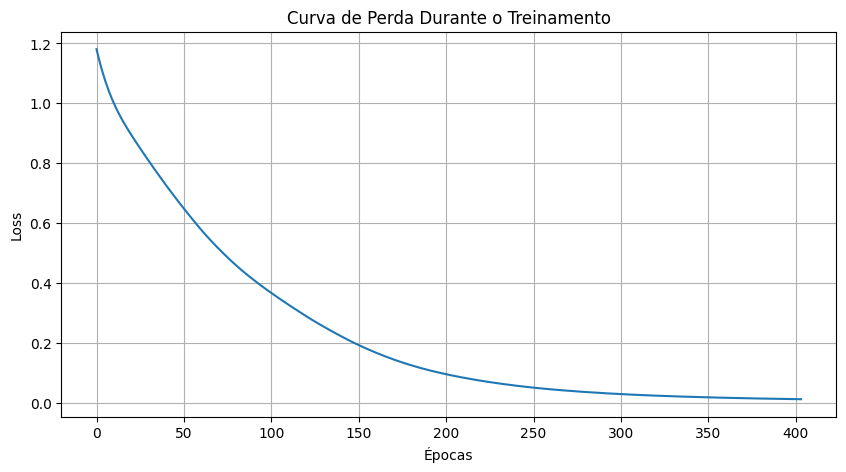

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [16]:
import joblib

# Salvar modelo
joblib.dump(mlp, 'modelo_mlp_status_moto.joblib')


['modelo_mlp_status_moto.joblib']

Esse bloco de código serve para fazer previsão individual, ou seja, responder:
como exemplo:"Se essa moto com essas características entrar no sistema agora, qual será o status dela?"

In [15]:

novo_dado = {
    'id_modelo': [2],
    'tempo_parado_dias': [12],
    'km_rodado_total': [15000],
    'dias_desde_ultima_manutencao': [100],
    'numero_manutencoes': [3],
    'idade_moto_meses': [24],
    'qtd_locacoes_mes': [10],
}


df_novo = pd.DataFrame(novo_dado)


df_novo_scaled = scaler.transform(df_novo)
predicao = mlp.predict(df_novo_scaled)

print("Status previsto:", predicao[0])  # 1: Liberada, 2: Manutenção, 3: Revisão


Status previsto: 2


gráfico para saber a quantidade de moto em cada sessão.

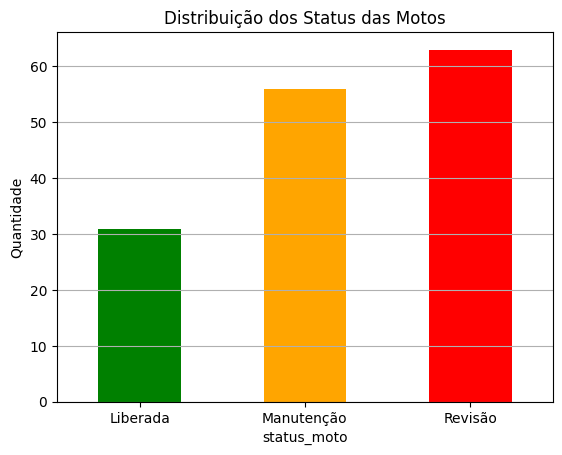

In [17]:
df['status_moto'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange', 'red'])
plt.xticks([0,1,2], ['Liberada', 'Manutenção', 'Revisão'], rotation=0)
plt.title("Distribuição dos Status das Motos")
plt.ylabel("Quantidade")
plt.grid(axis='y')
plt.show()


In [ ]:
Gráfico de matriz de confusão.

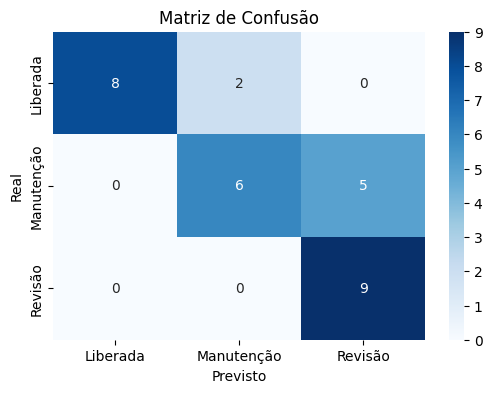

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Liberada', 'Manutenção', 'Revisão'],
            yticklabels=['Liberada', 'Manutenção', 'Revisão'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
